In [1]:
#importando bibliotecas
from sklearn.decomposition import NMF
#importando pandas para o dataset
import pandas as pd
import numpy as np
#biblioteca do kmeans
from sklearn.cluster import KMeans

from IPython.display import Image
from pathlib import Path

config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIRETORIO_SAIDAS = DIRETORIO_PRINCIPAL / "NMF"
DIRETORIO_DATASET = DIR_PREFIXO / "Projeto_PA"

In [2]:
#leitura do arquivo
data = pd.read_csv(DIRETORIO_DATASET / "dataset_modificado" / "pacientes_apos_regras_com_whitecoat.csv",sep=';')

#data = pd.read_csv(DIRETORIO_DATASET / "dataset_modificado" / "pacientes_inputados_e_nao_descartados_sample.csv",sep=';')


In [3]:
#filtra as variaveis que tem informação
#data = data[data['Descartado']==False]

In [4]:
######################################### Unnamed não sumiu ?
#verificar nome das colunas
data.columns

Index(['Unnamed: 0', 'numero_identificacao', 'data_nascimento', 'genero',
       'idade', 'peso', 'altura', 'data_exame', 'sist 9:00', 'sist 9:15',
       ...
       'diast 6:45', 'diast 7:00', 'diast 7:15', 'diast 7:30', 'diast 7:45',
       'diast 8:00', 'diast 8:15', 'diast 8:30', 'diast 8:45', 'whitecoat'],
      dtype='object', length=173)

In [5]:
#Apagar as colunas que não serão utilizadas, ou seja os dados de cadastro
data = data.drop(['Unnamed: 0','data_nascimento','genero','idade','peso','altura','data_exame', 'whitecoat'],axis=1)
#data = data.drop(['Unnamed: 0','data_nascimento','genero','idade','peso','altura','data_exame','Descartado','Qtd NaNs'],axis=1)

In [6]:
#apresentando os dados
data

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,4,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,NaN,...,41.0,NaN,NaN,NaN,NaN,67.0,61.0,69.0,62.0,51.0
1,5,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,...,NaN,NaN,74.0,NaN,NaN,NaN,60.0,74.0,70.0,67.0
2,6,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,...,80.0,86.0,93.0,NaN,NaN,NaN,86.0,87.0,82.0,82.0
3,7,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,...,49.0,56.0,62.0,83.0,104.0,NaN,NaN,89.0,90.0,72.0
4,8,NaN,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,...,64.0,NaN,NaN,93.0,68.0,91.0,NaN,NaN,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20935,21787,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
20936,21788,107.0,110.0,103.0,NaN,NaN,NaN,114.0,144.0,128.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
20937,21791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.0,68.0,83.0,84.0,85.0,NaN,NaN,NaN,NaN,NaN
20938,21792,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,...,NaN,NaN,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [7]:
#verificar a quantidade de nulos por campo
data.isnull().sum()

##########################################################################
#  se eliminar quem tem Nan, quantos ficam ? 

numero_identificacao       0
sist 9:00               7343
sist 9:15               6420
sist 9:30               6440
sist 9:45               6451
                        ... 
diast 7:45              4068
diast 8:00              4743
diast 8:15              5296
diast 8:30              5731
diast 8:45              7055
Length: 165, dtype: int64

## Tratamento de nulos

In [8]:
#trocar nulo por 0
data = data.fillna(0)

In [9]:
#verificando se existe nulos
data.isnull().sum()

numero_identificacao    0
sist 9:00               0
sist 9:15               0
sist 9:30               0
sist 9:45               0
                       ..
diast 7:45              0
diast 8:00              0
diast 8:15              0
diast 8:30              0
diast 8:45              0
Length: 165, dtype: int64

## Nonnegative Matrix Factorization 

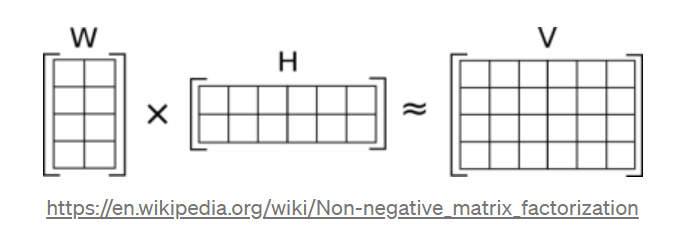

In [10]:
Image(filename=r"D:\Projeto_PA\dataset_modificado\imgs\Imagem1.png")

### Nosso objetivo no NMF é decompor a matriz (V) pelo produto escalar de dois arrays W e H. As dimensões dos arrays são definidas pelas dimensões de V (valores do paciente) e pelo número de componentes que definimos para o algoritmo. Se V tem n linhas e x colunas e queremos decompor em k componentes, então W tem n linhas e k colunas e H tem k linhas e x colunas.

In [11]:
#aplicando o NMF com numero de componente 3
model = NMF(n_components=3,init='random',random_state=0)

In [12]:
#tirando a variavel numero de identificação 
dta = data.drop(['numero_identificacao'],axis=1)


In [13]:
#aplicando nmf
model.fit(dta)

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=3, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [14]:
#Criando o H
H = pd.DataFrame(np.round(model.components_,2), columns=dta.columns)
H.index = ['Grupo 1', 'Grupo 2',  'Grupo 3']

In [15]:
#Ele criou três grupos, coloquei os nomes(Grupo 1, 2, 3) 
H

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
Grupo 1,3.68,2.30,0.67,0.00,0.00,0.00,0.00,0.00,0.85,2.15,...,4.59,4.65,4.81,5.20,5.46,5.68,5.68,5.26,4.55,3.28
Grupo 2,10.86,11.96,11.78,10.86,9.58,8.37,7.50,6.93,6.26,5.73,...,3.17,3.33,3.42,3.65,4.02,4.57,5.13,5.38,5.85,6.24
Grupo 3,0.00,0.97,2.52,4.11,5.65,7.13,8.21,8.97,9.18,9.05,...,3.71,2.93,3.25,2.81,1.96,0.81,0.00,0.00,0.00,0.00


In [16]:
#Calcular a somar total por grupos
lista = []
for k in range(0,3):
    sum_ = 0
    for i in H.columns:
        sum_ = sum_ + H.iloc[[k]][i]
    lista.append(sum_)

In [17]:
#o grupo com maior soma total é Grupo 3
lista

[Grupo 1    891.26
 dtype: float64, Grupo 2    632.34
 dtype: float64, Grupo 3    906.81
 dtype: float64]

#### O grupo 3 é o que tem a maior somar total dos valores entre sist e diast, mesmo que grupo 2 tenha os maiores valores por variavel (sist) ele que tem a menor somar total


In [18]:
#Salvar a planilha
H.to_excel('H.xlsx')

In [19]:
#Criei um grafico para apresentar as diferenças entre os grupos. É possivel ver a diferença entre os Grupos 3 e 1
#e o Grupo 2 no ponto sist 9:00, outro ponto é queda que ocorre entre os três grupos em momentos diferentes.    
#Image(filename='imgs/Grafico1.png')

In [20]:
#Gerar o W com numero do paciente, para verificar a importancia em que cada paciente tem em cada grupo
W = pd.DataFrame(np.round(model.transform(dta),2), columns=H.index)
W.index = dta.index

In [21]:
#exemplo o paciente 4 não tem influencia nenhuma no Grupo 1, esta presenta mais no Grupo 2 e 3 
W

,Grupo 1,Grupo 2,Grupo 3
0,7.55,4.91,2.29
1,2.09,5.72,8.05
2,3.72,7.83,9.03
3,2.08,9.03,10.27
4,0.00,4.18,9.61
...,...,...,...
20935,4.54,12.43,5.05
20936,5.03,7.23,3.12
20937,7.99,1.87,0.00
20938,2.01,10.05,4.38


#### No vetor W é possivel identificar a importancia dos dados dos pacientes para criação do grupo, como pode ser visto o Paciente 4 que não tem relação com o grupo 1, mas participar do grupo 2 e 3.

In [22]:
W.to_excel('W.xlsx')

In [23]:
#w_id = pd.concat([W, data["numero_identificacao"]], axis=1)


def gera_arquivos_com_ids_por_grupo(W):
    ww = W.copy()
    ww.index = data["numero_identificacao"]

    
    for col in ww.columns:
        # ids_in_group = ww.apply((lambda row: max(row) == row[col]),   axis=1)
            
        def seleciona_grupo(linha):
            # A função precisa estar aqui dentro para fazer uso da variável "col"
            return max(linha) == linha[col]
        
        # o método "apply" precisa, no primeiro parametro, de uma função que receba
        # uma unica linha do datframe como parametro. O retorno dessa
        # funcão é agregado em uma série, que pode funcionar como uma coluna,
        # ou, nesse caso, como um índice para selecionar ou não uma linha (uma coluna com True/False)
        ids_in_group = ww.apply(seleciona_grupo, axis=1)
        temp = ww[ids_in_group]
        print(col, "\n", ids_in_group, temp)
        temp.to_csv(DIRETORIO_SAIDAS /  f"{col}.csv", sep=";", encoding="latin1", index=True)

gera_arquivos_com_ids_por_grupo(W)


Grupo 1 
 numero_identificacao
4         True
5        False
6        False
7        False
8        False
         ...  
21787    False
21788    False
21791     True
21792    False
21793    False
Length: 20940, dtype: bool                       Grupo 1  Grupo 2  Grupo 3
numero_identificacao                           
4                        7.55     4.91     2.29
13                       7.35     2.06     4.43
17                       8.04     0.00     6.03
20                       7.48     2.26     6.14
21                       8.06     2.32     5.34
...                       ...      ...      ...
21758                   10.65     3.24     0.00
21760                   12.27     1.91     2.11
21763                   12.45     4.41     0.00
21764                    8.29     4.83     3.24
21791                    7.99     1.87     0.00

[6488 rows x 3 columns]
Grupo 2 
 numero_identificacao
4        False
5        False
6        False
7        False
8        False
         ...  
21787  

## Kmeans

In [24]:
#colocando zero nos nan
data = data.fillna(0)

In [25]:
#biblioteca do kmeans
from sklearn.cluster import KMeans


In [26]:
#Funções para calcular o melhor numero de cluster(grupos) que seu dataset gerar
def calculate_wcss(data):
    """
    Calcula a soma dos quadrados intra-clusters para 19
    quantidades de clusters, iniciando com o mínimo de 2 clusters
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do KMeans

    
    Returns
    -------
    wcss : lista contendo os valores de soma de quadrados intra-cluster
    """
    from sklearn.cluster import KMeans
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    """
    Calcula a maior distância entre os pontos que marcam as 
    somas dos quadrados intra-clusters para 19 calculadas 
    com `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista
        lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [27]:
#tirando a variavel numero de identificação 
dt = data.drop(['numero_identificacao'],axis=1)

In [28]:
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
sum_of_squares = calculate_wcss(dt)
#n = optimal_number_of_clusters(sum_of_squares)
numero_otimo_cluster = optimal_number_of_clusters(sum_of_squares)
print (n)

7


In [29]:
#convertendo os dados para a clusterização
X = np.array(dt)

In [30]:
#habilitando o kmeans com 7 grupos (foi calculado na etapa anterior)
kmeans = KMeans(n_clusters=numero_otimo_cluster, random_state=0).fit(X)

In [31]:
#lista de grupos 
grupos = kmeans.fit_predict(X)

In [32]:
data['grupo'] = grupos

In [33]:
data

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
0,4,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,0.0,...,0.0,0.0,0.0,0.0,67.0,61.0,69.0,62.0,51.0,2
1,5,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,...,0.0,74.0,0.0,0.0,0.0,60.0,74.0,70.0,67.0,3
2,6,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,...,86.0,93.0,0.0,0.0,0.0,86.0,87.0,82.0,82.0,0
3,7,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,...,56.0,62.0,83.0,104.0,0.0,0.0,89.0,90.0,72.0,0
4,8,0.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,...,0.0,0.0,93.0,68.0,91.0,0.0,0.0,81.0,72.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20935,21787,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,...,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0,1
20936,21788,107.0,110.0,103.0,0.0,0.0,0.0,114.0,144.0,128.0,...,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0,1
20937,21791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.0,83.0,84.0,85.0,0.0,0.0,0.0,0.0,0.0,2
20938,21792,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,...,0.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0,1


## Grupos de pacientes separados pelo Kmeans

In [34]:
#grupo 0 tem 4968 pacientes

data[data['grupo']==0]

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
2,6,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,...,86.0,93.0,0.0,0.0,0.0,86.0,87.0,82.0,82.0,0
3,7,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,...,56.0,62.0,83.0,104.0,0.0,0.0,89.0,90.0,72.0,0
6,10,122.0,119.0,117.0,115.0,110.0,108.0,120.0,116.0,118.0,...,0.0,0.0,40.0,67.0,69.0,97.0,95.0,94.0,92.0,0
14,18,142.0,123.0,124.0,0.0,0.0,159.0,142.0,141.0,133.0,...,76.0,68.0,86.0,64.0,100.0,88.0,110.0,119.0,90.0,0
25,29,162.0,162.0,164.0,148.0,97.0,130.0,127.0,146.0,149.0,...,65.0,62.0,70.0,69.0,58.0,60.0,62.0,64.0,64.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,21768,114.0,124.0,123.0,138.0,136.0,123.0,117.0,115.0,116.0,...,101.0,102.0,98.0,93.0,96.0,99.0,98.0,92.0,90.0,0
20921,21769,131.0,129.0,125.0,115.0,117.0,116.0,116.0,120.0,123.0,...,56.0,56.0,46.0,44.0,53.0,56.0,76.0,67.0,64.0,0
20923,21771,125.0,122.0,129.0,143.0,146.0,139.0,140.0,140.0,137.0,...,87.0,89.0,78.0,69.0,69.0,72.0,73.0,68.0,77.0,0
20925,21773,133.0,200.0,176.0,160.0,167.0,158.0,157.0,148.0,156.0,...,70.0,62.0,70.0,77.0,78.0,79.0,74.0,73.0,76.0,0


In [35]:
#grupo 1 tem 2063 pacientes
data[data['grupo']==1]

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
32,36,120.0,124.0,116.0,109.0,114.0,117.0,121.0,131.0,129.0,...,70.0,60.0,73.0,73.0,66.0,71.0,73.0,85.0,75.0,1
34,38,112.0,99.0,102.0,104.0,109.0,110.0,111.0,115.0,89.0,...,66.0,73.0,74.0,77.0,77.0,67.0,57.0,85.0,82.0,1
36,40,122.0,115.0,126.0,125.0,129.0,122.0,112.0,134.0,123.0,...,86.0,87.0,83.0,81.0,81.0,76.0,76.0,80.0,75.0,1
37,41,110.0,114.0,107.0,112.0,110.0,101.0,102.0,112.0,107.0,...,68.0,76.0,80.0,85.0,83.0,73.0,77.0,78.0,72.0,1
38,42,111.0,118.0,110.0,114.0,113.0,122.0,123.0,105.0,106.0,...,0.0,159.0,78.0,94.0,90.0,70.0,83.0,83.0,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20934,21786,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,...,114.0,126.0,0.0,0.0,0.0,123.0,121.0,119.0,123.0,1
20935,21787,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,...,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0,1
20936,21788,107.0,110.0,103.0,0.0,0.0,0.0,114.0,144.0,128.0,...,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0,1
20938,21792,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,...,0.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0,1


In [36]:
#grupo 2 tem 1963 pacientes
data[data['grupo']==2]

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
0,4,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,0.0,...,0.0,0.0,0.0,0.0,67.0,61.0,69.0,62.0,51.0,2
8,12,0.0,118.0,122.0,125.0,0.0,0.0,0.0,124.0,120.0,...,79.0,78.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,13,0.0,0.0,0.0,0.0,129.0,111.0,0.0,0.0,0.0,...,99.0,140.0,67.0,81.0,95.0,0.0,0.0,0.0,0.0,2
12,16,0.0,0.0,0.0,0.0,0.0,115.0,117.0,142.0,131.0,...,0.0,0.0,83.0,85.0,83.0,104.0,0.0,0.0,0.0,2
13,17,0.0,0.0,0.0,0.0,0.0,159.0,124.0,132.0,0.0,...,0.0,0.0,0.0,87.0,61.0,80.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20862,21704,115.0,0.0,0.0,0.0,88.0,96.0,105.0,0.0,0.0,...,0.0,0.0,74.0,80.0,84.0,88.0,0.0,0.0,0.0,2
20864,21706,129.0,142.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79.0,74.0,79.0,65.0,64.0,61.0,83.0,87.0,48.0,2
20868,21710,0.0,0.0,0.0,0.0,159.0,0.0,0.0,98.0,0.0,...,88.0,99.0,78.0,77.0,76.0,0.0,0.0,0.0,79.0,2
20878,21722,0.0,0.0,0.0,0.0,102.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,52.0,97.0,0.0,0.0,0.0,56.0,2


In [37]:
#grupo 3 tem 3370 pacientes
data[data['grupo']==3]

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
1,5,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,...,0.0,74.0,0.0,0.0,0.0,60.0,74.0,70.0,67.0,3
4,8,0.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,...,0.0,0.0,93.0,68.0,91.0,0.0,0.0,81.0,72.0,3
5,9,0.0,0.0,0.0,152.0,154.0,138.0,137.0,152.0,95.0,...,94.0,120.0,109.0,0.0,0.0,111.0,0.0,0.0,0.0,3
11,15,0.0,0.0,0.0,0.0,0.0,192.0,177.0,0.0,0.0,...,98.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
15,19,0.0,0.0,0.0,0.0,0.0,152.0,128.0,147.0,139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20886,21732,159.0,159.0,160.0,161.0,162.0,155.0,156.0,146.0,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,3
20887,21733,0.0,112.0,112.0,116.0,113.0,114.0,115.0,121.0,117.0,...,0.0,60.0,74.0,67.0,88.0,0.0,0.0,0.0,90.0,3
20891,21738,0.0,131.0,130.0,131.0,121.0,147.0,121.0,107.0,105.0,...,69.0,76.0,77.0,69.0,73.0,78.0,64.0,0.0,0.0,3
20892,21739,0.0,187.0,181.0,0.0,0.0,185.0,184.0,182.0,164.0,...,120.0,108.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [38]:
#grupo 4 tem 2788 pacientes
data[data['grupo']==4]

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
18,22,112.0,131.0,123.0,116.0,109.0,109.0,100.0,116.0,0.0,...,58.0,74.0,56.0,56.0,65.0,73.0,68.0,57.0,76.0,4
23,27,161.0,127.0,111.0,95.0,0.0,0.0,0.0,0.0,0.0,...,68.0,66.0,77.0,76.0,82.0,69.0,74.0,74.0,89.0,4
24,28,97.0,100.0,105.0,117.0,102.0,109.0,91.0,0.0,0.0,...,50.0,50.0,49.0,45.0,46.0,53.0,45.0,48.0,51.0,4
63,67,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,66.0,83.0,84.0,85.0,86.0,76.0,62.0,62.0,4
64,68,120.0,124.0,124.0,138.0,126.0,127.0,128.0,131.0,0.0,...,74.0,61.0,55.0,61.0,49.0,57.0,55.0,57.0,59.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20910,21757,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79.0,77.0,76.0,79.0,80.0,81.0,82.0,87.0,94.0,4
20911,21758,133.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,...,76.0,75.0,70.0,73.0,65.0,74.0,73.0,70.0,68.0,4
20913,21760,126.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,77.0,76.0,75.0,73.0,71.0,86.0,92.0,93.0,4
20915,21763,118.0,117.0,133.0,125.0,0.0,0.0,0.0,0.0,0.0,...,82.0,80.0,90.0,87.0,88.0,82.0,84.0,80.0,87.0,4


In [39]:
#grupo 5 tem 3397 pacientes
data[data['grupo']==5]

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
7,11,0.0,0.0,0.0,0.0,120.0,109.0,106.0,107.0,117.0,...,78.0,88.0,83.0,85.0,76.0,81.0,68.0,69.0,66.0,5
10,14,0.0,0.0,0.0,0.0,120.0,108.0,105.0,108.0,114.0,...,61.0,65.0,70.0,66.0,78.0,67.0,73.0,75.0,66.0,5
16,20,0.0,0.0,0.0,0.0,0.0,174.0,149.0,152.0,155.0,...,0.0,0.0,90.0,92.0,87.0,83.0,79.0,0.0,0.0,5
17,21,0.0,0.0,0.0,0.0,0.0,0.0,136.0,131.0,122.0,...,75.0,83.0,85.0,73.0,75.0,78.0,72.0,89.0,0.0,5
20,24,0.0,0.0,0.0,0.0,0.0,0.0,127.0,126.0,121.0,...,82.0,74.0,60.0,87.0,86.0,70.0,94.0,104.0,92.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20901,21748,124.0,0.0,0.0,0.0,0.0,0.0,125.0,148.0,138.0,...,70.0,83.0,80.0,82.0,87.0,83.0,83.0,73.0,87.0,5
20903,21750,0.0,0.0,0.0,0.0,0.0,0.0,156.0,150.0,143.0,...,67.0,60.0,73.0,60.0,83.0,75.0,78.0,84.0,77.0,5
20905,21752,0.0,0.0,0.0,0.0,0.0,0.0,161.0,155.0,147.0,...,87.0,89.0,101.0,117.0,123.0,112.0,115.0,116.0,117.0,5
20908,21755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,...,52.0,54.0,59.0,55.0,62.0,84.0,80.0,78.0,68.0,5


In [40]:
#grupo 6 tem 2391 pacientes
data[data['grupo']==6]

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
19,23,122.0,121.0,105.0,110.0,119.0,125.0,131.0,126.0,123.0,...,59.0,55.0,51.0,71.0,72.0,70.0,64.0,53.0,63.0,6
27,31,113.0,124.0,129.0,124.0,122.0,126.0,123.0,137.0,142.0,...,64.0,66.0,66.0,73.0,61.0,66.0,63.0,78.0,79.0,6
29,33,108.0,114.0,131.0,123.0,138.0,130.0,131.0,123.0,123.0,...,56.0,59.0,62.0,62.0,46.0,47.0,54.0,49.0,64.0,6
30,34,134.0,132.0,115.0,128.0,140.0,132.0,134.0,132.0,138.0,...,78.0,87.0,68.0,69.0,80.0,76.0,92.0,88.0,81.0,6
31,35,130.0,103.0,121.0,126.0,128.0,127.0,126.0,138.0,136.0,...,68.0,63.0,62.0,59.0,79.0,90.0,68.0,88.0,80.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20926,21774,137.0,153.0,128.0,138.0,137.0,136.0,139.0,143.0,148.0,...,60.0,54.0,58.0,62.0,67.0,66.0,71.0,42.0,54.0,6
20928,21776,121.0,119.0,125.0,122.0,126.0,111.0,108.0,106.0,100.0,...,84.0,85.0,77.0,78.0,71.0,83.0,80.0,73.0,72.0,6
20930,21779,137.0,121.0,118.0,148.0,111.0,115.0,111.0,128.0,136.0,...,61.0,52.0,50.0,52.0,65.0,72.0,79.0,57.0,77.0,6
20931,21781,153.0,149.0,136.0,152.0,157.0,153.0,141.0,135.0,136.0,...,90.0,93.0,104.0,94.0,91.0,99.0,96.0,103.0,98.0,6


In [41]:
dt

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,0.0,0.0,...,41.0,0.0,0.0,0.0,0.0,67.0,61.0,69.0,62.0,51.0
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,0.0,0.0,74.0,0.0,0.0,0.0,60.0,74.0,70.0,67.0
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,80.0,86.0,93.0,0.0,0.0,0.0,86.0,87.0,82.0,82.0
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,49.0,56.0,62.0,83.0,104.0,0.0,0.0,89.0,90.0,72.0
4,0.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,64.0,0.0,0.0,93.0,68.0,91.0,0.0,0.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20935,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
20936,107.0,110.0,103.0,0.0,0.0,0.0,114.0,144.0,128.0,104.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
20937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,68.0,83.0,84.0,85.0,0.0,0.0,0.0,0.0,0.0
20938,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,0.0,0.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


## Identificar as variaveis mais importantes para identificar os Grupos de Pacientes (Random)

In [42]:
#importando a libre
from sklearn.ensemble import RandomForestClassifier

In [43]:
#parametizando o random
random_forest = RandomForestClassifier(n_estimators=100)

In [44]:
#treino
random_forest.fit(dt,data['grupo'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
#calculo da importancia de cada variavel para identificar os grupos com 3 casas decimais
importances = pd.DataFrame({'feature':dt.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [46]:
#tabela com o grau de importancia de cada variavel(da mais importante pra menos) para separação dos grupos 
importances

,importance
feature,
diast 9:30,0.029
diast 8:00,0.027
sist 8:15,0.026
sist 9:30,0.023
sist 9:45,0.023
...,...
sist 1:30,0.002
diast 21:00,0.002
sist 3:00,0.002
